In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist     import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
import pubplot

from   schechter     import schechter, named_schechter
from   findfile      import findfile

In [4]:
version = 'GAMA4'
survey  = 'gama'
dryrun  =  False

In [5]:
fpath = findfile(ftype='gold', dryrun=dryrun, version=version, survey=survey)
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold.fits'

In [6]:
gold = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'FALSE'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0)])

##  VMAX

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
vmax  = Table.read(fpath)
vmax.sort('MCOLOR_0P0')
vmax

MCOLOR_0P0,IN_D8LUMFN,ZSURV,FILLFACTOR_VMAX,FILLFACTOR,ZMAX,RA,MALL_0P0,FIELD,ZMIN,DEC,VZ,VMAX
mag,,,,,,deg,mag,,,deg,,
float64,int64,float32,float64,float64,float64,float64,float64,bytes3,float64,float64,float64,float64
-23.461170534036924,0,0.2563,0.7075619414341472,1.0,0.2715100049972534,179.0450651,-23.417599538706114,G12,0.039663288528705265,-0.35024037,4993519.459696529,5881059.924096177
-23.442632031321555,0,0.10734,0.7075029561242174,0.9151988682115066,0.2715100049972534,182.1835035,-23.424384233236342,G12,0.03933423422922606,-2.07231294,383951.7411264599,5881090.289238529
-23.107939332154334,0,0.13893,0.7066439781049916,1.0,0.2715100049972534,213.78496641,-23.084321237531245,G15,0.0339096951732739,-0.49323659,846294.2968766553,5881348.428092647
-23.082316886159298,0,0.22878,0.7065860680101017,1.0,0.2715100049972534,178.51993046,-23.04342428919923,G12,0.03350598251431382,0.60517927,3613270.664928616,5881333.134972404
-23.045208950883637,0,0.24896,0.70651182360271,1.0,0.2715100049972534,180.52796941,-23.002885748988877,G12,0.03294944890178139,-0.24151196,4599197.066192231,5881340.480242628
-23.010391635049515,0,0.20644,0.7064502496370619,1.0,0.2715100049972534,184.98709908,-22.975296822537118,G12,0.03247041721586893,-0.85050901,2690580.330995149,5881349.6698676655
-22.976202885033608,0,0.20233,0.706383985254839,1.0004493115365345,0.2715100049972534,222.36929583,-22.94180678796959,G15,0.03194881372599459,-1.27151016,2539381.9168547923,5881349.05145412
-22.94904753859117,0,0.08135,0.7063324453515957,0.947391207452521,0.2715100049972534,179.83440251,-22.93521803910806,G12,0.031541209667382365,-1.64817036,167915.99306903203,5881338.326491684


##  LUMFN

In [8]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
lumfn = Table.read(fpath)
lumfn = lumfn[lumfn['N'] > 5.]
lumfn

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.831925312129783,-22.864672608757225,-22.7,-22.86467221252737,4.914395182202463e-06,1.7375010793829303e-06,6.801227075549467e-06,2.404596892799115e-06,8.0,0.7225723964189527
-22.704044909575536,-22.69803884734222,-22.5,-22.698039156161983,3.194356868431601e-05,4.429775954331044e-06,4.4208118344736694e-05,6.130562980263248e-06,52.0,0.7225693682660896
-22.46463274592758,-22.481083738461145,-22.299999999999997,-22.481084071450834,5.590124519755302e-05,5.860042769446878e-06,7.736211589437128e-05,8.109753303008029e-06,91.0,0.7225934230065113
-22.285094947604357,-22.290579952100963,-22.099999999999998,-22.290580392845257,0.00011364538858843197,8.355375142374793e-06,0.00015727158094830935,1.1562836595636136e-05,185.0,0.7226075637494193
-22.09683320928304,-22.09626631811732,-21.9,-22.09626654726368,0.00022606217838131332,1.1784305666411362e-05,0.0003128374854205255,1.6307781242025063e-05,368.0,0.7226196162208872
-21.885558642098573,-21.89021627030132,-21.7,-21.890216963219842,0.0003974517103606242,1.5625439076048313e-05,0.00055000579233479,2.1622958906230902e-05,647.0,0.7226294977364217
-21.687855113067435,-21.691249562583632,-21.5,-21.691249566797634,0.000644400068266298,1.9896094437410427e-05,0.0008917124764309553,2.7531958042497254e-05,1049.0,0.7226545681105612
-21.48999970826809,-21.493036737717073,-21.299999999999997,-21.49303673771707,0.001057209263571305,2.54841718314394e-05,0.0014629524398295363,3.526466579747753e-05,1721.0,0.7226545681105612
-21.28914781181131,-21.29347549148593,-21.099999999999998,--,0.0014288603992253662,2.9626813577385068e-05,--,--,2326.0,--


Text(0.5, 1.0, 'GAMA')

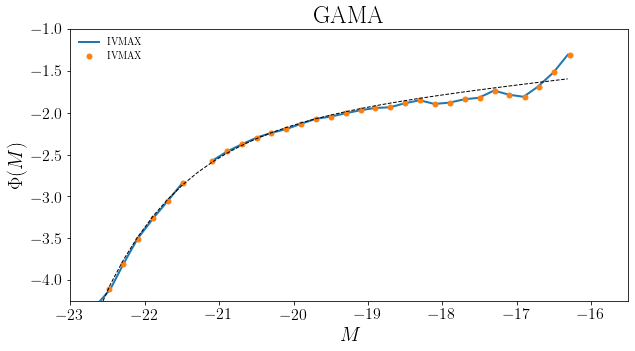

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

pl.sca(ax)

# pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_N'] / 0.77), label='RAW', lw=2.)
pl.plot(lumfn['MEDIAN_M'],    np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=2.)
pl.plot(lumfn['IVMAXMEAN_M'], np.log10(lumfn['PHI_IVMAX']),    label='IVMAX', lw=0., marker='.')

pl.plot(lumfn['MEDIAN_M'],    np.log10(named_schechter(lumfn['MEDIAN_M'], 'TMR')), linestyle='--', c='k', lw=1.)

# pl.scatter(lumfn_tmr['Ms'], lumfn_tmr['PHI_STEP'], s=0.5)
# pl.plot(lumfn_tmr['Ms'], lumfn_tmr['PHI_STEP'], label='TMR_SWML', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)
pl.title(survey.upper())

In [12]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
ddp   = Table.read(fpath)
ddp   = ddp[ddp['MCOLOR_0P0'] > -16.5]
ddp.sort('ZMAX')
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,BOUND_DIST,rRANDSEP,rRANDMATCH,rBOUND_DIST,rFILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
3885866,588010930833720024,135.89216253,-1.59989053,19.79879,0.01913,3,G09_Y4_201_099,5,21.111166,19.830143,19.624992,19.463436,19.159803,0.01913,58.23656723127899,33.82597883732409,G9,2,0,-41.014753323858095,39.75694158101026,-1.595428630441649,40.734764295540565,-40.041964586359256,-1.6400720896142431,0.2051506,19.79879,0.21310850995874878,0,2,-0.13476045403622627,-0.14271835974692815,0.029341393698033152,0.00413602535927568,0.23035597258680435,2.12,-0.018556101,-0.0405556,-14.037974151747107,-14.015974652917862,-14.056530252994776,33.83676412977445,33.85532023102212,33.814764630945206,-0.18808820319905228,-0.24293694375240532,0.028636675163148828,0.022238345961257955,-14.037269433212224,0.001209259,0.01914057713140389,0.0,-7.79879,0.0005323764772190999,0.0,3415.9585541320084,0 .. 0,1 .. 1,10780.0,0.20943477188783072,0.2976833955959391,0.6746034343104808,1257717,0.3452503995579404,0.20312071687182062,0.0,0,2,4,-99.0,-99
8480,588848900987486613,182.47796837,0.67909776,19.789885,0.01915,4,G12_Y1_ND5_288,5,20.860147,19.998114,19.72312,19.643885,19.739418,0.01915,58.298373693126614,33.82828219867051,G12,2,0,-57.14543292081807,-2.4730081465030795,0.6779814634205791,57.16199627827204,2.074481777241864,0.6153362526587615,0.2749939,19.789885,0.29328450892908514,0,2,-0.14091228167316655,-0.15920289411787455,0.025932071473279666,0.006131474570549633,0.29479449338710506,2.12,-0.0185755,-0.040597998,-14.045754202186147,-14.023731705277244,-14.064329702883045,33.83563876944689,33.854214270143785,33.813616272537985,-0.18806031637460274,-0.24291135687966586,0.02866456198759837,0.022263932833997413,-14.048486692700466,0.01011467,0.019238826673532626,0.0,-7.7898846,0.0005343133974404233,0.0,3468.6376736824286,0 .. 0,1 .. 1,10185.0,0.19787506045246342,0.35732155079395417,0.43049692025751585,15067,0.5990737422674296,0.20925999439754947,0.0,18,28,60,-99.0,-99
402403,587728308031390135,174.91458961,1.95910608,19.758127,0.01985,3,G12_Y1_AX2_319,5,21.195854,20.027178,19.75573,19.693892,19.629356,0.01985,60.462836372194296,33.90744258254336,G12,2,0,-59.01812145764674,5.252079477428639,2.0267626874846387,58.98225052833568,-5.663476012324586,1.9621234131980374,0.27144814,19.758127,0.28982214231761483,0,2,-0.13984703359337133,-0.15822104053500846,0.0268788856165742,0.006315277877057185,0.2920117431154936,2.12,-0.019254502,-0.042082,-14.156939753726503,-14.134112255111715,-14.17619425563552,33.91506696625092,33.934321468159936,33.89223946763613,-0.18708672093339992,-0.24201267179187028,0.029638157428801187,0.

##  Cobaya

In [ ]:
# root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [ ]:
# dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [ ]:
# samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [ ]:
# samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [ ]:
# tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [ ]:
# g = plots.get_subplot_plotter()

In [ ]:
# g.triangle_plot([samples], filled=True)        

# Done.